# Proyek Analisis Data: [Bike Sharing Dataset - hour.csv dan day.csv]
- **Nama:** Fayiz Akbar Daifullah
- **Email:** fayizzakbar@gmail.com
- **ID Dicoding:** fayiz_akbar

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda pada hari kerja (weekday) dibandingkan akhir pekan (weekend) selama tahun 2011 hingga 2012?

- Pada jam berapa terjadi lonjakan tertinggi peminjaman sepeda pada hari kerja selama musim semi (spring) dalam rentang tahun 2011–2012?

- Bagaimana performa peminjaman sepeda pada 2011 hingga 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

**Insight:**

- File `hour.csv` dan `day.csv` berhasil dimuat tanpa error ke dalam DataFrame `hour_df` dan `day_df`.
- Dataset `hour.csv` berisi data peminjaman sepeda per jam, sedangkan `day.csv` berisi data peminjaman sepeda harian.

### Assessing Data

-Menampilkan 5 Baris pertama dataset

In [3]:
hour_head = hour_df.head()

print(hour_head)

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


-Memeriksa Tipe data Setiap Kolom

In [4]:
hour_info = hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dataframe ini tidak memiliki nilai Null dan duplikat, namun pada column 'dteday' ada kesalahan tipe data yang seharusnya 'date' menjadi 'object'

-Memeriksa Missing Value

In [5]:
hour_missing = hour_df.isnull().sum()

print("Hour :\n",hour_missing, "\n")

Hour :
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



Missing Valuenya 0

-Memeriksa Duplikasi

In [6]:
hour_duplicate =hour_df.duplicated().sum()

print("Hour :\n",hour_duplicate, "\n")

Hour :
 0 



Berdasarkan Output program diatas duplikasinya 0

-Memeriksa Data yang tidak konsisten ataua tidak valid dengan cek nilai unik kategorikal dan rentang nilai numerik 

In [7]:
print("Rentang nilai unik kategorikal")
print("season:", hour_df['season'].unique())
print("weathersit:", hour_df['weathersit'].unique())

print("\nRentang nilai numerik:")
print("temp:", hour_df['temp'].min(), "-", hour_df['temp'].max())
print("atemp:", hour_df['atemp'].min(), "-", hour_df['atemp'].max())
print("hum:", hour_df['hum'].min(), "-", hour_df['hum'].max())
print("windspeed:", hour_df['windspeed'].min(), "-", hour_df['windspeed'].max())

Rentang nilai unik kategorikal
season: [1 2 3 4]
weathersit: [1 2 3 4]

Rentang nilai numerik:
temp: 0.02 - 1.0
atemp: 0.0 - 1.0
hum: 0.0 - 1.0
windspeed: 0.0 - 0.8507


-Semua kolom kategorikal memiliki nilai yang masuk akal dan sesuai rentang

-Kolom numerik berada dalam skala normalisasi (0–1).

### Cleaning Data

-Ubah Tipe Data Kolom dteday

In [8]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])


-Ubah Tipe Data Kolom dteday

In [9]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


-menambahkan kolom day_type

In [10]:
hour_df['day_type'] = hour_df['weekday'].apply(lambda x: 'weekend' if x in [0,6] else 'weekday')


## Exploratory Data Analysis (EDA)

### Explore Data

In [11]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dapat dilihat pada rangkuman statistik diatas, data peminjaman sepeda sejak 2011 hingga 2012 kita mendapatkan beberapa informasi seperti jumlah peminjam sepeda paling sedikit dalam satu hari adalah 22 orang dan jumlah peminjam sepeda terbanyak dalam satu hari adalah 8714 orang dengan standar deviasinya sebesar 1937.211452.

In [12]:
hour_df.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
       nunique  max min        mean         std
season                                         
1          181  801   1  111.114569  119.224010
2          184  957   1  208.344069  188.362473
3          188  977   1  236.016237  197.711630
4          178  967   1  198.868856  182.967972

Berdasarkan output tersebut dapat disimpulkan bahwa pada tahun 2011 hingga 2012, rata rata peminjaman sepeda tertinggi ada pada Musim Gugur dan terendah pada Musim Semi

In [13]:
weather_daytype_group = hour_df.groupby(['weathersit', 'day_type'])['cnt'].describe()
print(weather_daytype_group)


                      count        mean         std   min   25%    50%  \
weathersit day_type                                                      
1          weekday   7973.0  206.559513  192.575666   1.0  44.0  167.0   
           weekend   3440.0  200.951744  182.096779   1.0  49.0  141.0   
2          weekday   3328.0  181.605168  168.924898   1.0  44.0  144.0   
           weekend   1216.0  157.541118  154.166608   1.0  34.0  102.5   
3          weekday   1062.0  112.395480  137.385915   1.0  20.0   64.0   
           weekend    357.0  109.151261  122.582211   1.0  24.0   61.0   
4          weekday      2.0  100.000000   90.509668  36.0  68.0  100.0   
           weekend      1.0   23.000000         NaN  23.0  23.0   23.0   

                        75%    max  
weathersit day_type                 
1          weekday   297.00  977.0  
           weekend   323.25  776.0  
2          weekday   260.25  957.0  
           weekend   240.00  783.0  
3          weekday   152.00  891.0  


pada tahun 2011 hingga 2012, rata-rata peminjaman sepeda tertinggi terjadi saat cuaca cerah hingga berawan (weathersit = 1), baik di hari kerja maupun akhir pekan. Sebaliknya, jumlah peminjaman paling rendah terjadi saat cuaca hujan ringan, salju, badai, atau kabut tebal (weathersit = 3 atau 4). Ini menunjukkan bahwa cuaca sangat berpengaruh terhadap keputusan masyarakat untuk meminjam sepeda.

In [14]:
spring_weekday = hour_df[(hour_df['season'] == 2) & (hour_df['day_type'] == 'weekday')]
avg_by_hour = hour_df.groupby('hr')['cnt'].mean()
print(avg_by_hour)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


onjakan tertinggi peminjaman sepeda pada hari kerja selama musim semi terjadi pada jam 08:00 pagi dan jam 17:00 sore, selaras dengan jam sibuk mobilitas masyarakat (berangkat dan pulang kerja).

In [15]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

daily_rent = hour_df.groupby('dteday')['cnt'].sum()

print(daily_rent.head())
print(daily_rent.describe())

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
Name: cnt, dtype: int64
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


rata-rata peminjaman tertinggi terjadi di musim panas dan gugur. Musim dingin cenderung memiliki jumlah peminjaman lebih rendah, kemungkinan karena cuaca yang tidak mendukung. Jumlah hari unik juga merata di tiap musim, menandakan distribusi data yang seimbang.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda pada hari kerja (weekday) dibandingkan akhir pekan (weekend) selama tahun 2011 hingga 2012?

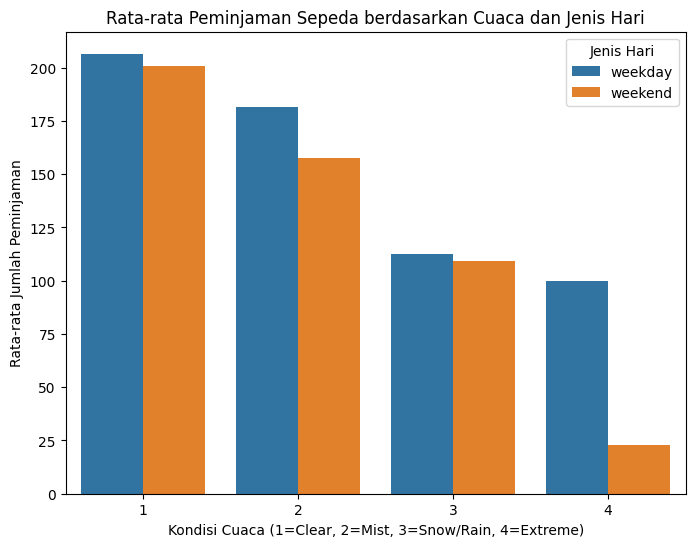

In [17]:
avg_rent_weather_daytype = hour_df.groupby(['weathersit', 'day_type'])['cnt'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_rent_weather_daytype, x='weathersit', y='cnt', hue='day_type')
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Cuaca dan Jenis Hari')
plt.xlabel('Kondisi Cuaca (1=Clear, 2=Mist, 3=Snow/Rain, 4=Extreme)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.legend(title='Jenis Hari')
plt.show()

Peminjaman sepeda cenderung lebih tinggi saat cuaca cerah atau sebagian berawan (weathersit = 1), baik di hari kerja maupun akhir pekan. Sebaliknya, saat cuaca buruk seperti hujan atau badai, jumlah peminjaman turun secara signifikan. Ini menunjukkan bahwa kondisi cuaca memainkan peran penting dalam keputusan pengguna untuk menyewa sepeda.

### Pertanyaan 2:

Pada jam berapa terjadi lonjakan tertinggi peminjaman sepeda pada hari kerja selama musim semi (spring) dalam rentang tahun 2011–2012?


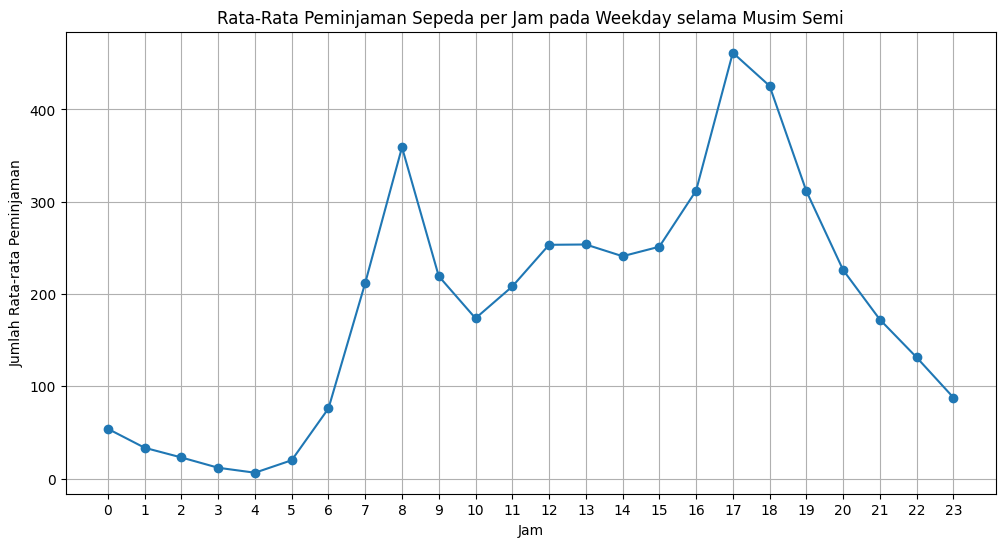

In [18]:
plt.figure(figsize=(12, 6))
avg_by_hour.plot(kind='line', marker='o')
plt.title('Rata-Rata Peminjaman Sepeda per Jam pada Weekday selama Musim Semi')
plt.xlabel('Jam')
plt.ylabel('Jumlah Rata-rata Peminjaman')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


Lonjakan tertinggi terjadi pada pukul 17.00 (jam 5 sore) atau mendekati jam 5, menunjukkan bahwa pengguna banyak menyewa sepeda saat pulang kerja. Hal ini menunjukkan bahwa sepeda digunakan sebagai moda transportasi alternatif oleh pekerja di musim semi.

### Pertanyaan 3:

Bagaimana performa peminjaman sepeda pada 2011 hingga 2012?

In [19]:
main_df = hour_df.copy()
mapping_yr = {0: '2011', 1: '2012'}
mapping_mnth = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
mapping_season = {1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'}
mapping_weathersit = {1:'Clear', 2: 'Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Ice Pallets'}


main_df['yr'] = main_df['yr'].map(mapping_yr)
main_df['mnth'] = main_df['mnth'].map(mapping_mnth)
main_df['weekday'] = main_df['dteday'].dt.day_name()
main_df['season'] = main_df['season'].map(mapping_season)
main_df['weathersit'] = main_df['weathersit'].map(mapping_weathersit)
main_df = main_df[['dteday', 'yr', 'mnth', 'hr', 'weekday', 'season', 'weathersit','cnt', 'registered', 'casual']]

print(main_df)

          dteday    yr      mnth  hr   weekday  season weathersit  cnt  \
0     2011-01-01  2011   January   0  Saturday  Spring      Clear   16   
1     2011-01-01  2011   January   1  Saturday  Spring      Clear   40   
2     2011-01-01  2011   January   2  Saturday  Spring      Clear   32   
3     2011-01-01  2011   January   3  Saturday  Spring      Clear   13   
4     2011-01-01  2011   January   4  Saturday  Spring      Clear    1   
...          ...   ...       ...  ..       ...     ...        ...  ...   
17374 2012-12-31  2012  December  19    Monday  Spring     Cloudy  119   
17375 2012-12-31  2012  December  20    Monday  Spring     Cloudy   89   
17376 2012-12-31  2012  December  21    Monday  Spring      Clear   90   
17377 2012-12-31  2012  December  22    Monday  Spring      Clear   61   
17378 2012-12-31  2012  December  23    Monday  Spring      Clear   49   

       registered  casual  
0              13       3  
1              32       8  
2              27       5  

In [20]:
monthly_rentals = main_df.groupby(['yr', 'mnth'])[['cnt', 'registered', 'casual']].sum().reset_index()

monthly_rentals = monthly_rentals[['yr', 'mnth', 'cnt', 'registered', 'casual']]

print(monthly_rentals)

      yr       mnth     cnt  registered  casual
0   2011      April   94870       72524   22346
1   2011     August  136691      107849   28842
2   2011   December   87323       78875    8448
3   2011   February   48215       41973    6242
4   2011    January   38189       35116    3073
5   2011       July  141341      104889   36452
6   2011       June  143512      112900   30612
7   2011      March   64045       51219   12826
8   2011        May  135821      104771   31050
9   2011   November  102167       86573   15594
10  2011    October  123511       98289   25222
11  2011  September  127418      100873   26545
12  2012      April  174224      135768   38456
13  2012     August  214503      171306   43197
14  2012   December  123713      110468   13245
15  2012   February  103137       94416    8721
16  2012    January   96744       87775    8969
17  2012       July  203607      161902   41705
18  2012       June  202830      159536   43294
19  2012      March  164875      133257 

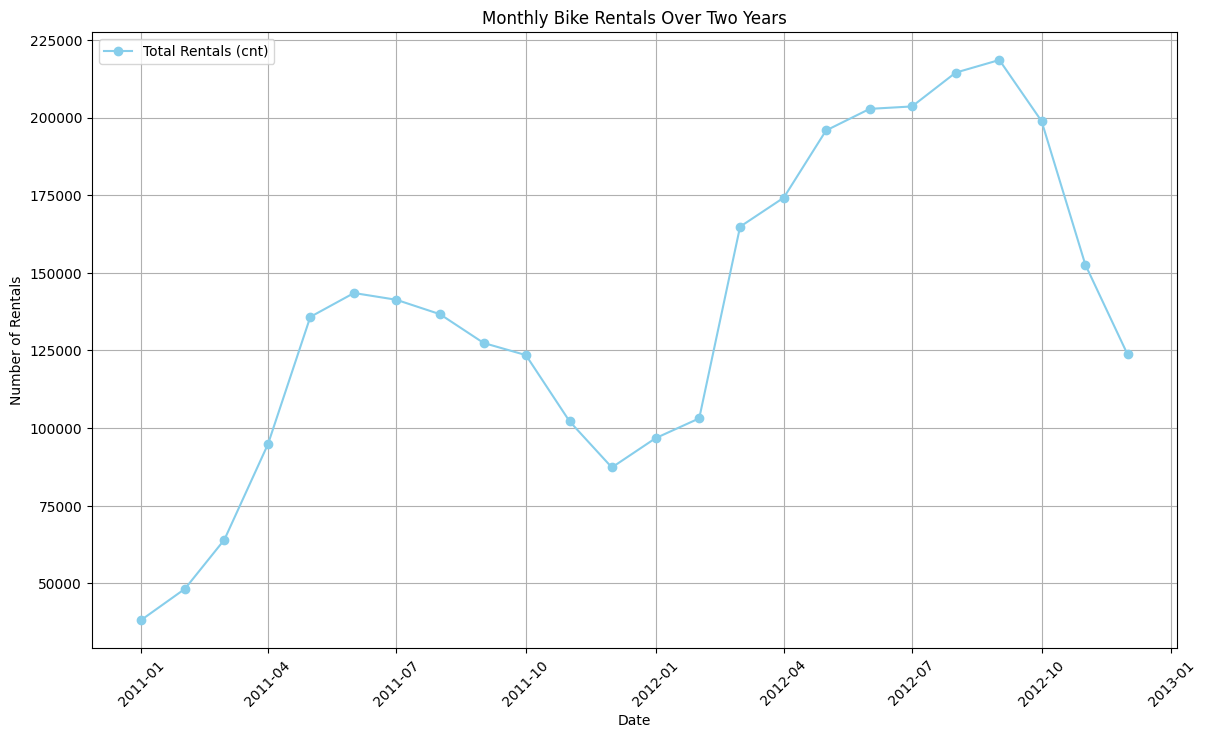

In [21]:
monthly_rentals['date'] = monthly_rentals['yr'] + '-' + monthly_rentals['mnth']
monthly_rentals['date'] = pd.to_datetime(monthly_rentals['date'], format='%Y-%B')
monthly_rentals = monthly_rentals.sort_values('date')

plt.figure(figsize=(14, 8))
plt.plot(monthly_rentals['date'], monthly_rentals['cnt'], marker='o', label='Total Rentals (cnt)', color='skyblue')
plt.title('Monthly Bike Rentals Over Two Years')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


Pada tahun 2011, tren peminjaman sepeda mengalami peningkatan yang cukup baik di kuartal pertama dan melonjak tajam pada kuartal kedua. Memasuki kuartal ketiga, jumlah peminjaman mulai menurun meskipun secara perlahan, dan penurunan tersebut berlanjut hingga kuartal keempat dengan intensitas yang lebih besar.

Sementara itu, di tahun 2012, terjadi lonjakan peminjaman yang signifikan pada akhir kuartal pertama, dan tren tersebut terus naik hingga kuartal ketiga. Namun, penurunan kembali terlihat di kuartal keempat. Secara keseluruhan, grafik menunjukkan adanya tren pertumbuhan peminjaman sepeda yang cukup positif.

## Analisis Lanjutan (Opsional)

pengaruh cuaca terhadap jumlah penyewaan sepeda di hari kerja dan hari libur

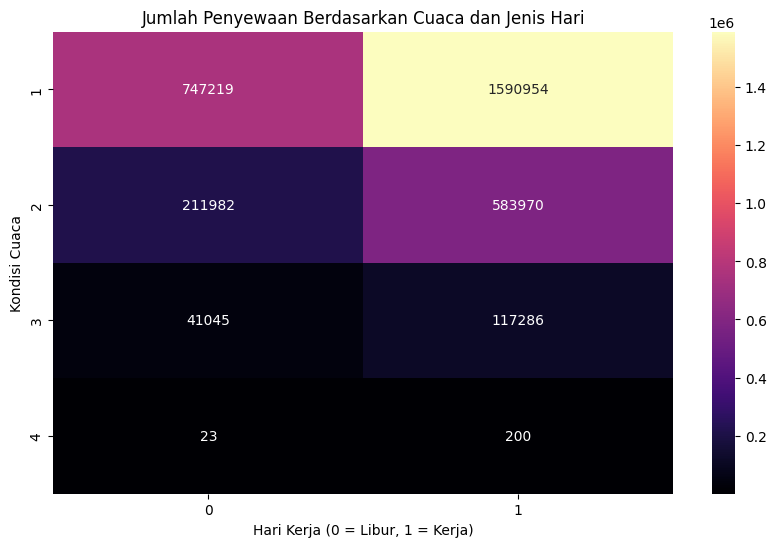

In [22]:
cluster_counts = hour_df.groupby(['weathersit', 'workingday'])['cnt'].sum().reset_index()
heatmap_data = cluster_counts.pivot(index='weathersit', columns='workingday', values='cnt')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='magma')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Kerja)')
plt.ylabel('Kondisi Cuaca')
plt.title('Jumlah Penyewaan Berdasarkan Cuaca dan Jenis Hari')
plt.show()

Hasil analisis lanjutan 2 yang dapat kita simpulkan dari heat map diatas adalah:

Cuaca Cerah (1) dan Hari Kerja (1): Kombinasi ini memiliki warna paling terang dan angka tertinggi (1.590.954), menunjukkan jumlah penyewaan sepeda tertinggi. Hal ini menunjukkan bahwa orang-orang lebih suka menyewa sepeda saat cuaca cerah dan untuk aktivitas sehari-hari seperti bekerja atau sekolah.

Cuaca Buruk (4) dan Hari Libur (0): Kombinasi ini memiliki warna paling gelap dan angka terendah (23), menunjukkan jumlah penyewaan sepeda terendah. Hal ini menunjukkan bahwa orang-orang cenderung tidak menyewa sepeda saat cuaca buruk, terutama di hari libur.

## Conclusion

- Conclution pertanyaan 1 :

kondisi cuaca sangat berpengaruh terhadap peminjaman sepeda dimana semakin extreme cuaca yang ada maka peminjaman sepeda semakin berkurang baik di hari kerja maupun akhir pekan. Sebaliknya, saat cuaca buruk seperti hujan atau badai, jumlah peminjaman turun secara signifikan. Ini menunjukkan bahwa kondisi cuaca memainkan peran penting dalam keputusan orang untuk menyewa sepeda.  

- Conclution pertanyaan 2 :

lonjakan sepeda terdapat lonjakan di jam 17.00 dan di jam 18.00 dimana pada jam segitu terdapat faktor fakor yang daapat menyebabkan lonjakan dan di jam pagi jam 08.00 juga meningkat walaupun tidak senigfikan jam 08.00  

- Conclution pertanyaan 3 :

Performa peminjaman sepeda pada tahun 2011 hingga 2012 mengalami peningkatan yang cukup baik dimana peningkatan yang signifikan akan terjadi diantara kuartal 2 hingga kuartal 3 tiap tahunnya dan mengalami penurunan di kuartal akhir tahun.